In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
train_df.shape

(1168, 81)

In [4]:
train_df['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [5]:
train_df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [6]:
train_df['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [7]:
train_df['MiscFeature'].value_counts()

Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64

In [8]:
train_df['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
15500       1
1150        1
800         1
620         1
1400        1
480         1
2500        1
450         1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64

In [9]:
train_df['EnclosedPorch'].value_counts()

0      999
112     13
96       6
192      5
216      5
      ... 
196      1
200      1
205      1
208      1
160      1
Name: EnclosedPorch, Length: 106, dtype: int64

In [10]:
train_df['WoodDeckSF'].value_counts()

0      603
144     29
192     28
100     26
120     25
      ... 
185      1
342      1
183      1
344      1
857      1
Name: WoodDeckSF, Length: 244, dtype: int64

In [11]:
train_df['OpenPorchSF'].value_counts()

0      531
36      24
48      18
20      17
24      14
      ... 
176      1
180      1
182      1
187      1
111      1
Name: OpenPorchSF, Length: 176, dtype: int64

In [12]:
train_df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
290       1
245       1
238       1
196       1
182       1
304       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [13]:
train_df['PoolArea'].value_counts()

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

Observations:
1. The feature "Id" is un-necessary
2. Since most of the values in the feature "Alley" are not filled, it is better to drop it
3. The feature "PoolQC" has all Null values, so let's drop the column
4. Most values in the feature "Fence" are Null, so let us drop it
5. Most values in the feature "MiscFeature" is null, so let us drop it
6. Most values in the features "MiscVal","EnclosedPorch","WoodDeckSF","OpenPorchSF","3SsnPorch","PoolArea","TotRmsAbvGrd is 0, let us drop it as it would cause a lot of skewness

In [14]:
train_df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','WoodDeckSF','EnclosedPorch','OpenPorchSF','3SsnPorch','PoolArea','TotRmsAbvGrd'], axis=1, inplace=True)

In [15]:
train_df.columns.to_list()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondit

In [16]:
train_df.shape

(1168, 69)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [18]:
for i in train_df.columns:
    print(train_df[i].value_counts())

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64
Pave    1164
Grvl       4
Name: Street, dtype: int64
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
AllPub    1168
Name: Utilities, dtype: int64
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConf

In [19]:
train_df.drop(['MasVnrArea','FireplaceQu','MasVnrType','BsmtFinSF2','2ndFlrSF','LowQualFinSF','BsmtHalfBath','ScreenPorch'],axis=1,inplace=True)

Dropped the above columns as they had more than 50% values filled with 0.

In [20]:
train_df['SaleCondition'].value_counts()

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

#### I'm dropping th columns which I feel is not necessary in predicting the price of the property that is being sold

In [21]:
train_df.drop(['MSZoning','LandContour','LotFrontage','Utilities','LandSlope','Condition1',
               'Condition2','BsmtExposure','BsmtFinSF1','BsmtFinType2','BsmtUnfSF','Street',
               'Functional','GarageQual'],axis=1,inplace=True)

In [22]:
train_df.columns.to_list()

['MSSubClass',
 'LotArea',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [23]:
train_df['BsmtQual'].fillna('TA',inplace=True)

In [24]:
train_df['BsmtFinType1'].fillna('Unf',inplace=True)

In [25]:
train_df['GarageType'].fillna('Attchd',inplace=True)

In [26]:
train_df['GarageYrBlt'].fillna(2006.0,inplace=True)

In [27]:
train_df['GarageFinish'].fillna('Unf',inplace=True)

In [28]:
train_df['GarageCond'].fillna('TA',inplace=True)

In [29]:
train_df.shape

(1168, 47)

### Seperating categorical and numerical columns

In [30]:
categorical_columns=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [31]:
categorical_columns

['LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [32]:
numerical_columns=[]
for i in train_df.dtypes.index:
    if train_df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice']


In [33]:
numerical_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'MoSold',
 'YrSold',
 'SalePrice']

In [34]:
train_df

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,4928,IR1,Inside,NPkVill,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,ALQ,1078,GasA,TA,Y,SBrkr,958,958,0,2,0,2,1,TA,1,Attchd,1977.0,RFn,2,440,TA,Y,2,2007,WD,Normal,128000
1,20,15865,IR1,Inside,NAmes,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,Gd,Gd,PConc,TA,Gd,ALQ,2217,GasA,Ex,Y,SBrkr,2217,2217,1,2,0,4,1,Gd,1,Attchd,1970.0,Unf,2,621,TA,Y,10,2007,WD,Normal,268000
2,60,9920,IR1,CulDSac,NoRidge,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,Gd,TA,PConc,Gd,TA,GLQ,1117,GasA,Ex,Y,SBrkr,1127,2013,1,2,1,3,1,TA,1,Attchd,1997.0,Unf,2,455,TA,Y,6,2007,WD,Normal,269790
3,20,11751,IR1,Inside,NWAmes,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,BLQ,1844,GasA,Ex,Y,SBrkr,1844,1844,0,2,0,3,1,TA,1,Attchd,1977.0,RFn,2,546,TA,Y,1,2010,COD,Normal,190000
4,20,16635,IR1,FR2,NWAmes,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Gd,TA,CBlock,Gd,TA,ALQ,1602,GasA,Gd,Y,SBrkr,1602,1602,0,2,0,3,1,Gd,1,Attchd,1977.0,Fin,2,529,TA,Y,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,9819,IR1,Inside,Sawyer,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,TA,Gd,CBlock,TA,TA,BLQ,882,GasA,TA,Y,SBrkr,900,900,0,1,0,3,1,TA,0,Detchd,1970.0,Unf,1,280,TA,Y,2,2010,WD,Normal,122000
1164,20,8777,Reg,Inside,Edwards,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,TA,NaN,Unf,0,GasA,Ex,Y,SBrkr,1126,1126,0,2,0,2,1,Gd,0,Detchd,2002.0,Fin,2,520,TA,N,5,2009,WD,Normal,108000
1165,160,2280,Reg,FR2,NPkVill,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,TA,TA,CBlock,Gd,TA,ALQ,855,GasA,TA,Y,SBrkr,855,1456,0,2,1,3,1,TA,1,Attchd,1976.0,Unf,2,440,TA,Y,7,2009,WD,Normal,148500
1166,70,8500,Reg,Inside,IDOTRR,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,TA,Fa,BrkTil,TA,TA,Unf,649,GasA,TA,N,SBrkr,649,1317,0,1,0,3,1,TA,0,Detchd,1920.0,Unf,1,250,Fa,N,7,2008,WD,Normal,40000


# Univariate Analysis

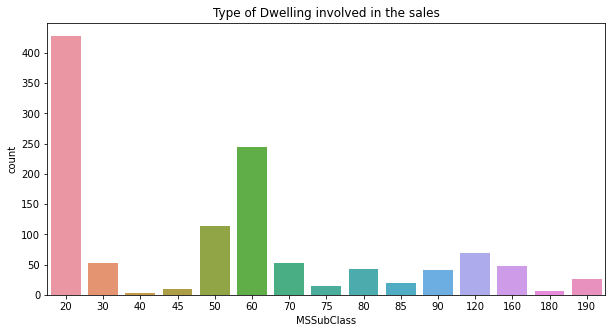

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.MSSubClass) 
plt.title('Type of Dwelling involved in the sales')
plt.show()

The count of houses of the style "STORY 1946 & NEWER ALL STYLES" is the highest

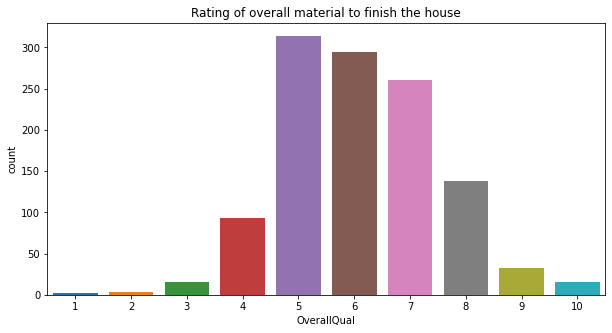

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.OverallQual) 
plt.title('Rating of overall material to finish the house')
plt.show()

Overall quality of most number of houses are "Average" followed by "Above Average" houses

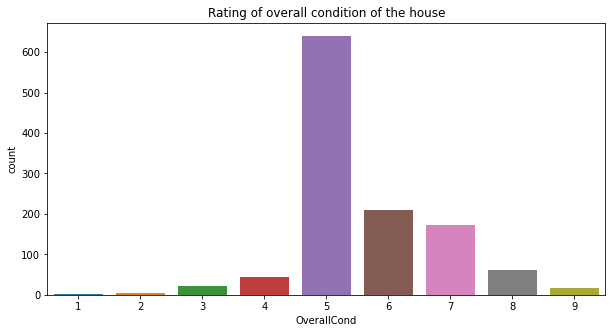

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.OverallCond) 
plt.title('Rating of overall condition of the house')
plt.show()

Overall condition of maximum number of houses is "Average"

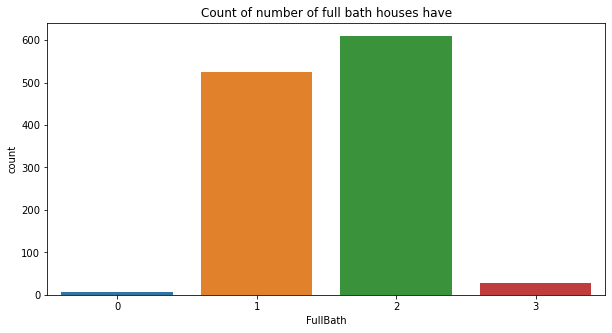

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.FullBath) 
plt.title('Count of number of full bath houses have')
plt.show()

Many houses have 2 full baths

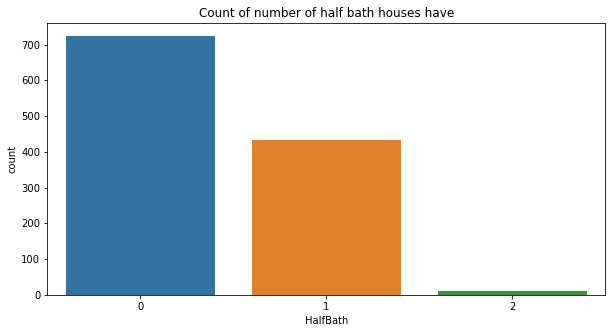

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.HalfBath) 
plt.title('Count of number of half bath houses have')
plt.show()

Most the houses do not have have baths, it means that those houses have full baths

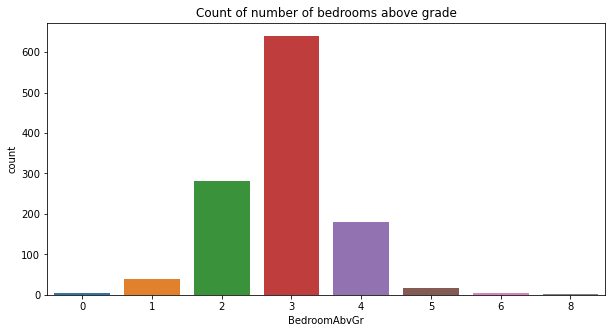

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.BedroomAbvGr) 
plt.title('Count of number of bedrooms above grade')
plt.show()

Most of the houses have 3 bedrooms that are above grade

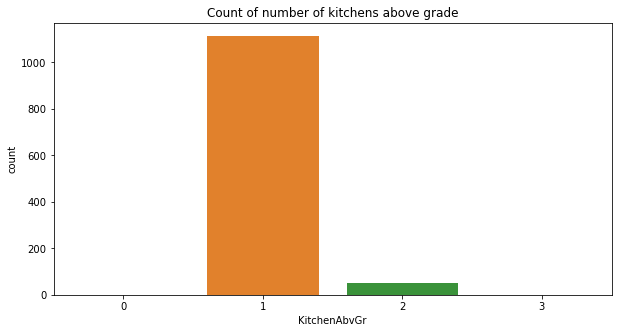

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.KitchenAbvGr) 
plt.title('Count of number of kitchens above grade')
plt.show()

Most of the houses have 1 kitchen that is above grade

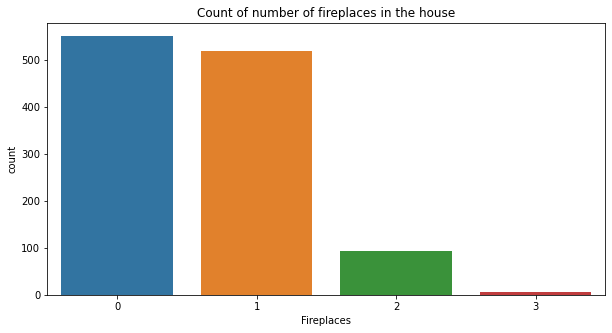

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.Fireplaces) 
plt.title('Count of number of fireplaces in the house')
plt.show()

We can see that most of the houses do not have a fire place, and almost equivalent number of houses have 1 fire place

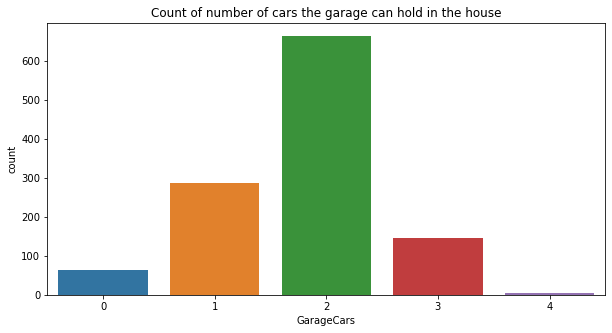

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.GarageCars) 
plt.title('Count of number of cars the garage can hold in the house')
plt.show()

Most of the garage's have space for 2 cars

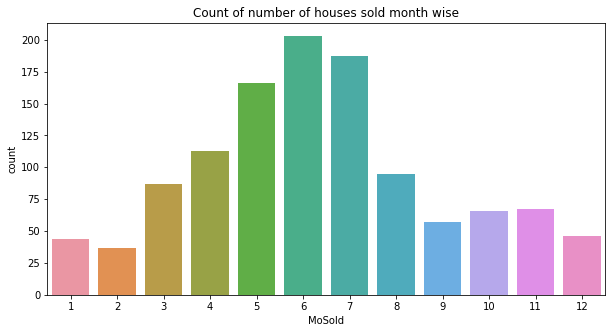

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.MoSold) 
plt.title('Count of number of houses sold month wise')
plt.show()

Most of the houses were sold in the month of June

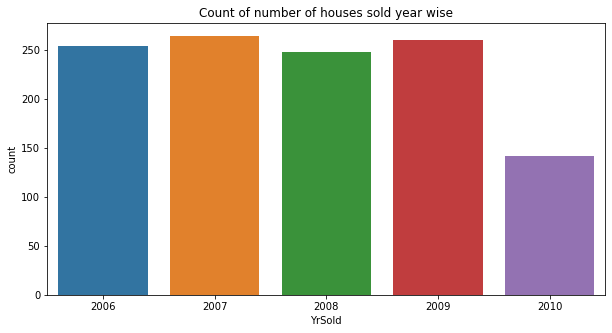

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.YrSold) 
plt.title('Count of number of houses sold year wise')
plt.show()

We can see that the year does not matter much when it comes to seeling a house

Most of the properties that are sold are RL- Residential Low density

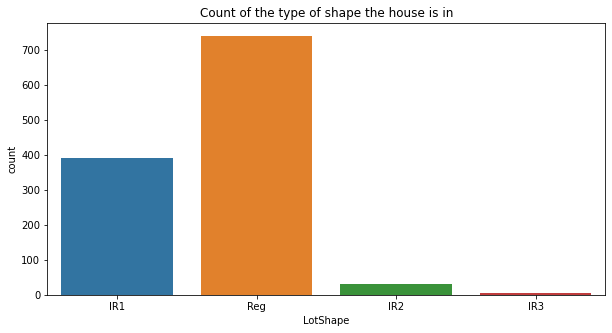

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.LotShape) 
plt.title('Count of the type of shape the house is in')
plt.show()

Most of the properties are regular in shape

Most of the properties are Near Flat

Almost all the properties have a gentle slope

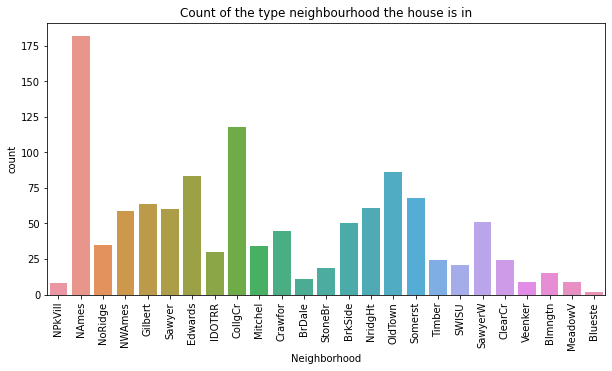

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.Neighborhood) 
plt.title('Count of the type neighbourhood the house is in')
plt.xticks(rotation=90)
plt.show()

Most of the properties are in the North Ames neighbourhood

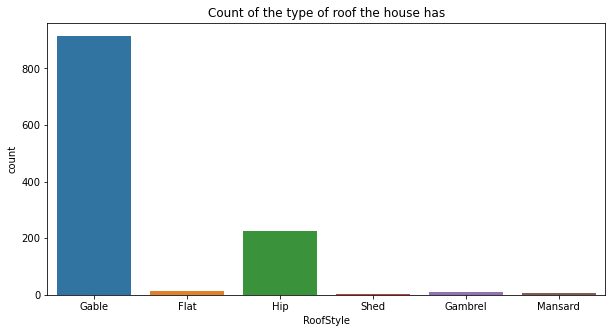

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.RoofStyle) 
plt.title('Count of the type of roof the house has')
plt.show()

Most properties Roof style is Gable.

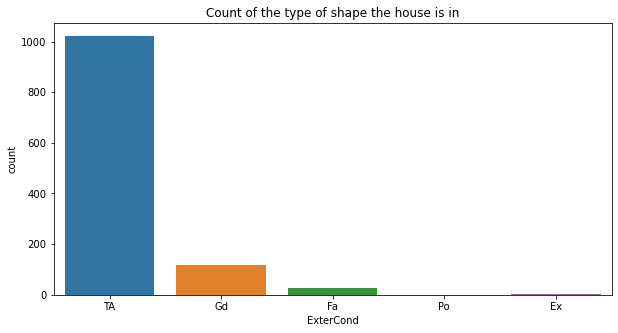

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.ExterCond) 
plt.title('Count of the type of shape the house is in')
plt.show()

The exterior conditions of most of the properties are Average

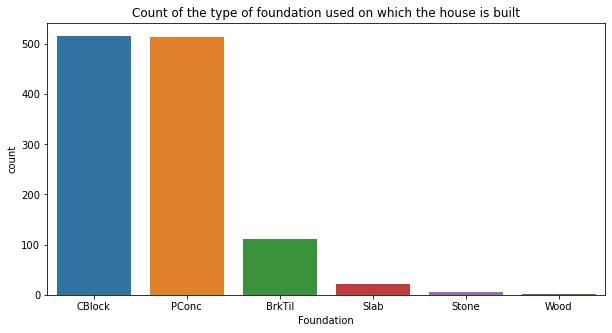

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.Foundation) 
plt.title('Count of the type of foundation used on which the house is built')
plt.show()

Most house foundations have cinder block as the foundation

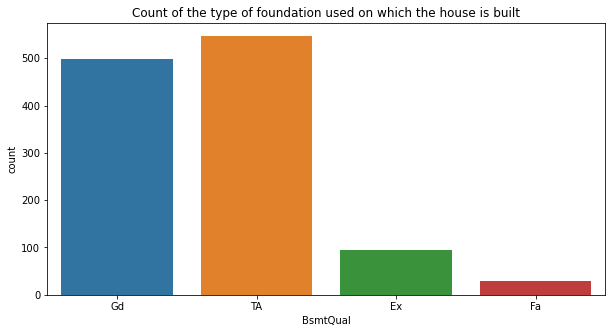

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.BsmtQual) 
plt.title('Count of the type of foundation used on which the house is built')
plt.show()

Most properties have a typical type of basement

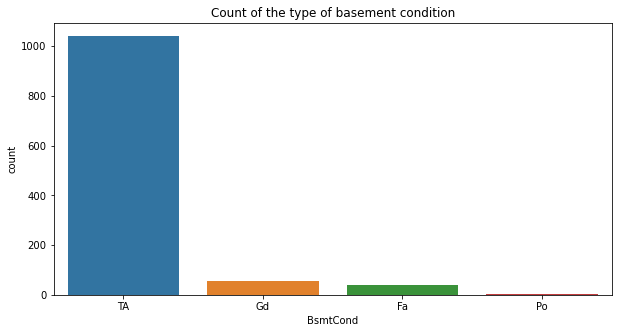

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.BsmtCond) 
plt.title('Count of the type of basement condition')
plt.show()

Almost all of the basements have a typical basement condition

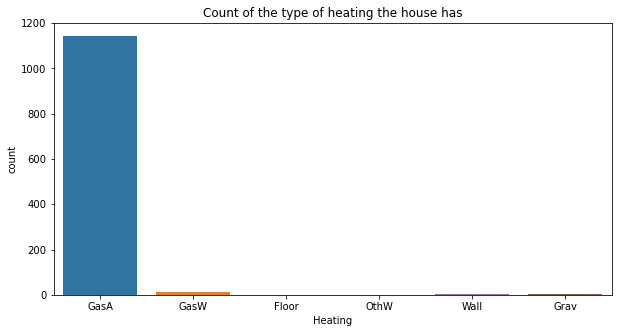

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.Heating) 
plt.title('Count of the type of heating the house has')
plt.show()

Almost 99% of the properties have a gas forced warm air furnace

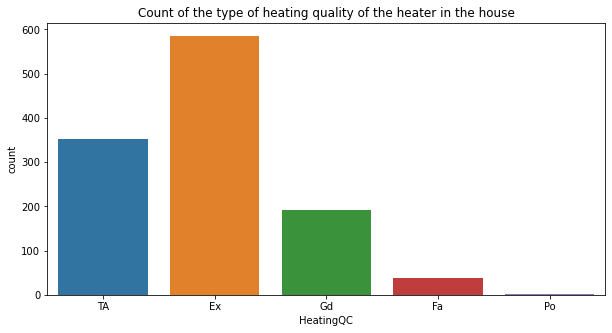

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.HeatingQC) 
plt.title('Count of the type of heating quality of the heater in the house')
plt.show()

Almost 50% of the houses have an excellent heating capacity

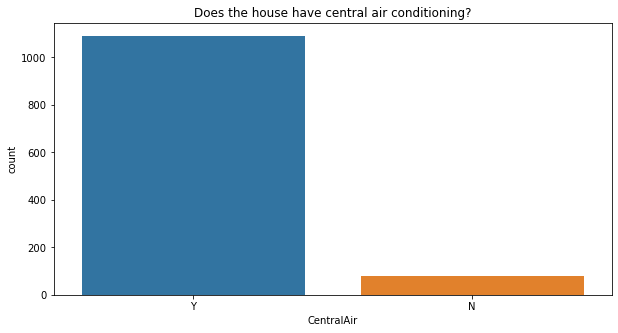

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(train_df.CentralAir) 
plt.title('Does the house have central air conditioning?')
plt.show()

Almost 95% of the houses have central air conditioning

# Bivariate Analysis

We can see that the range Sale price of the house is more when the type of street is paved rathen than gravel

This houses which have a leveled property have a higher sale price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

<Figure size 576x288 with 0 Axes>

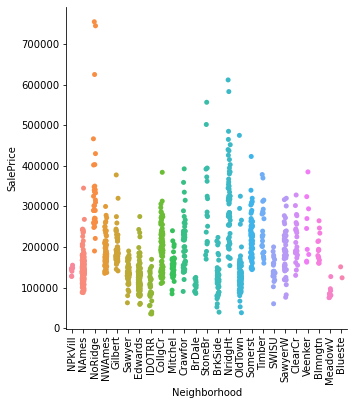

In [56]:
plt.figure(figsize=[8,4])
sns.catplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=90)

<Figure size 576x288 with 0 Axes>

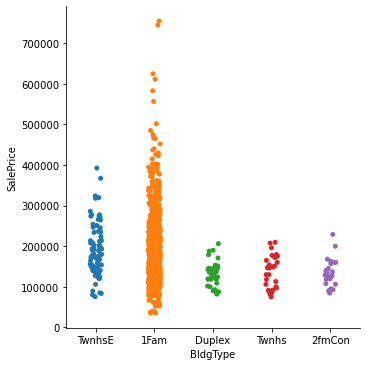

In [57]:
plt.figure(figsize=[8,4])
sns.catplot(x='BldgType', y='SalePrice', data=train_df)

<Figure size 576x288 with 0 Axes>

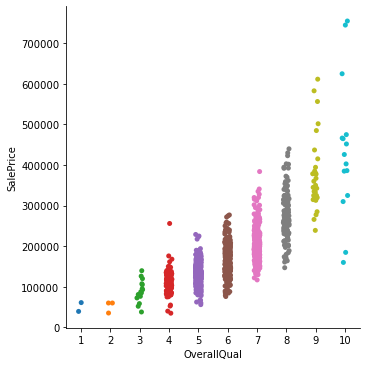

In [58]:
plt.figure(figsize=[8,4])
sns.catplot(x='OverallQual', y='SalePrice', data=train_df)

As we can see the better the quality of the house, higher is the sale price

<Figure size 576x288 with 0 Axes>

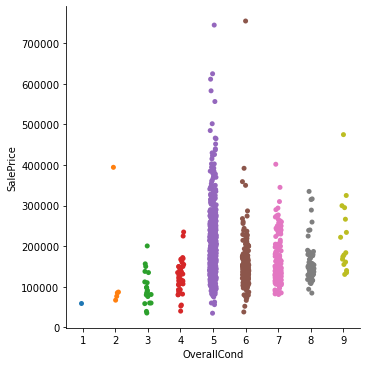

In [59]:
plt.figure(figsize=[8,4])
sns.catplot(x='OverallCond', y='SalePrice', data=train_df)

There are a lot of outliers for sure in this case, as a average house price cannot be higher than a house which has better quality

<Figure size 576x288 with 0 Axes>

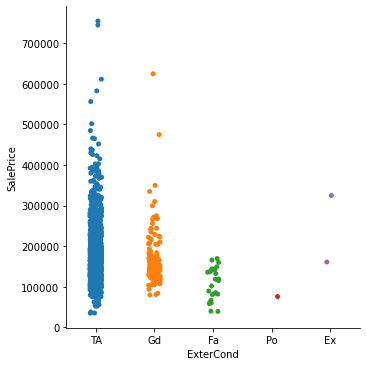

In [60]:
plt.figure(figsize=[8,4])
sns.catplot(x='ExterCond', y='SalePrice', data=train_df)

There are outliers in this case as well

<Figure size 576x288 with 0 Axes>

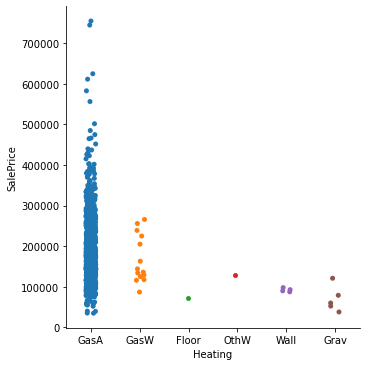

In [61]:
plt.figure(figsize=[8,4])
sns.catplot(x='Heating', y='SalePrice', data=train_df)

The price of houses have a higher range when air furnaces are used for heating the house

<Figure size 576x288 with 0 Axes>

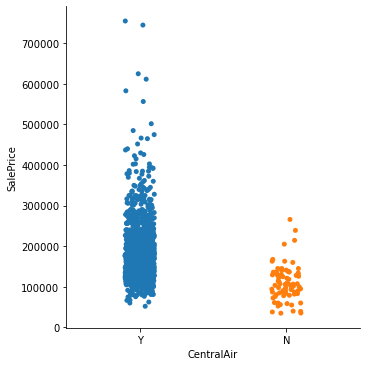

In [62]:
plt.figure(figsize=[8,4])
sns.catplot(x='CentralAir', y='SalePrice', data=train_df)

Obviously the sale price is higher when central air conditioning is available 

<Figure size 576x288 with 0 Axes>

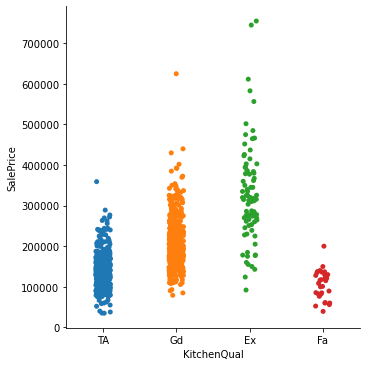

In [63]:
plt.figure(figsize=[8,4])
sns.catplot(x='KitchenQual', y='SalePrice', data=train_df)

The price of the houses increases as the quality of the kitchen is better

<Figure size 576x288 with 0 Axes>

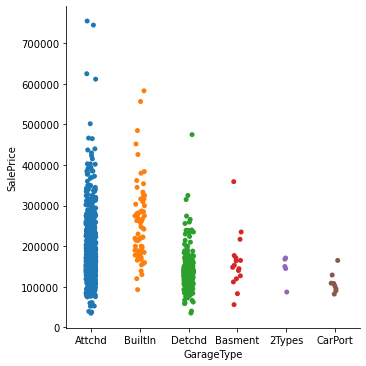

In [64]:
plt.figure(figsize=[8,4])
sns.catplot(x='GarageType', y='SalePrice', data=train_df)

Houses with attached garage's have a higher sale price

<Figure size 576x288 with 0 Axes>

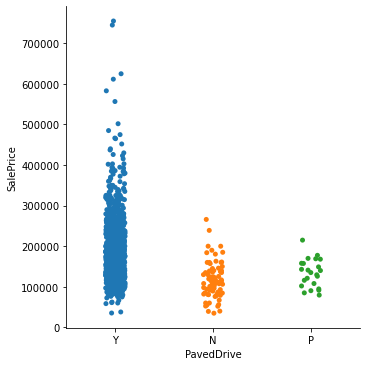

In [65]:
plt.figure(figsize=[8,4])
sns.catplot(x='PavedDrive', y='SalePrice', data=train_df)

The sale prices of houses incrases because of paved drive through

<Figure size 576x288 with 0 Axes>

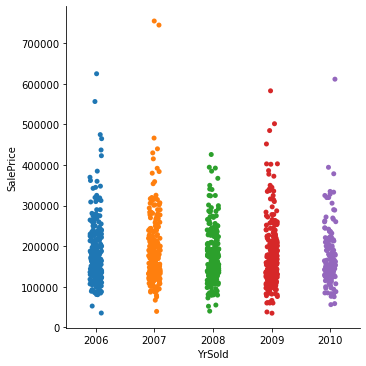

In [66]:
plt.figure(figsize=[8,4])
sns.catplot(x='YrSold', y='SalePrice', data=train_df)

The year the property was sold in doesn't affect the price of the property, probably because there was not much appreciation

# Checking outliers

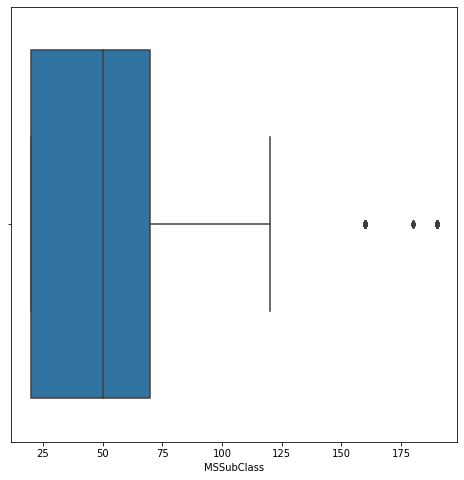

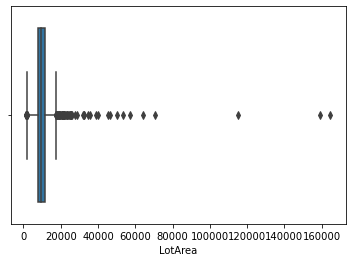

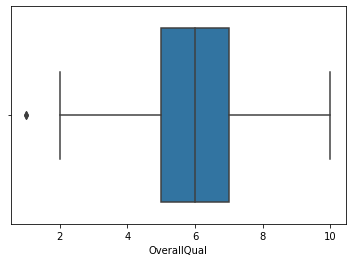

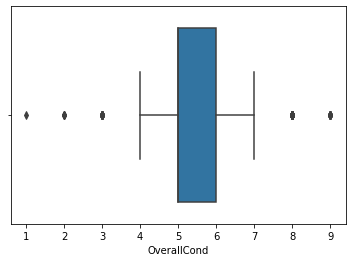

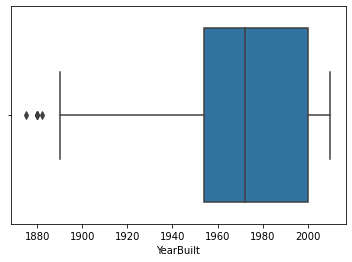

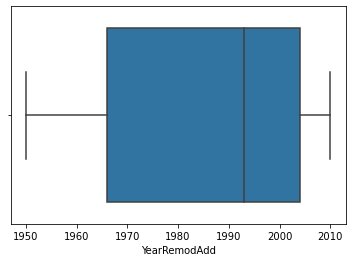

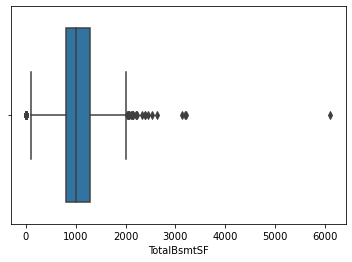

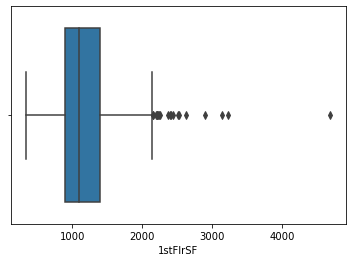

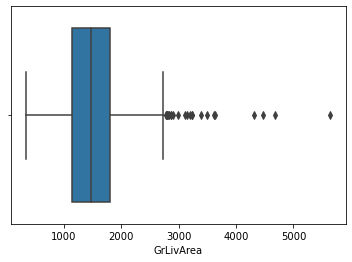

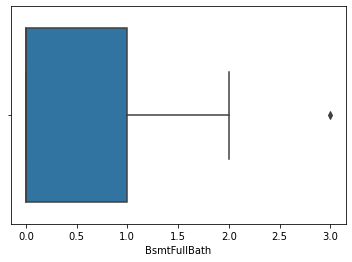

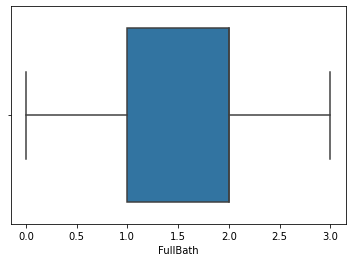

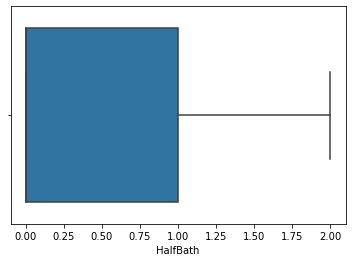

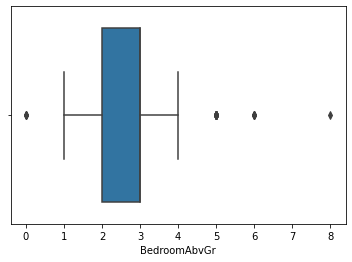

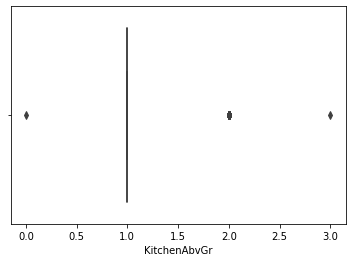

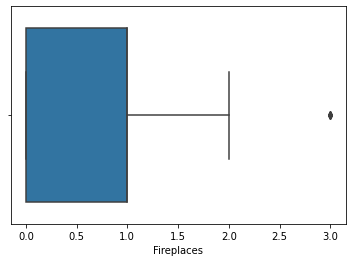

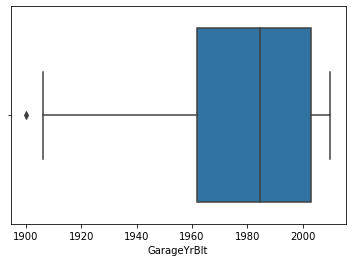

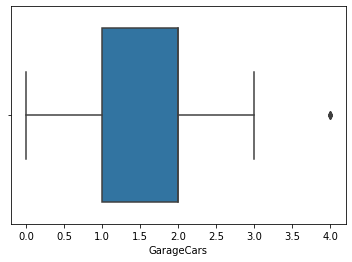

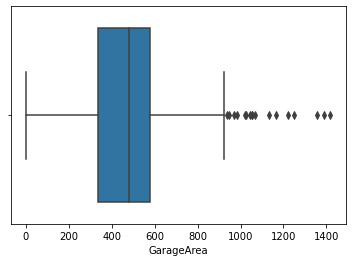

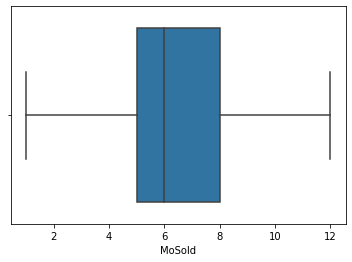

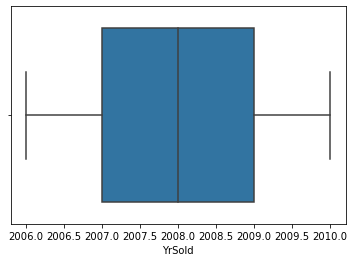

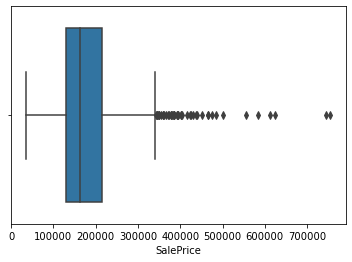

In [67]:
plt.figure(figsize=(8,8))
for i in numerical_columns:
    sns.boxplot(train_df[i])
    plt.show()

Features that have outliers:
1. MSSubClass
2. LotArea
3. OverallQual
4. OverallCond
5. YearBuilt
6. TotalBsmtSF
7. 1stFlrSF
8. GrLivArea
9. BedroomAbvGr
10. KitchenAbvGr
11. Fireplaces
12. GarageYrBlt
13. GarageCars
14. GarageArea

In [68]:
features = train_df[['MSSubClass','LotArea','OverallQual','OverallCond','TotalBsmtSF',
                     '1stFlrSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','Fireplaces',
                     'GarageYrBlt','GarageCars','GarageArea']]

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(features))
new_df=train_df[(z<3).all(axis=1)]
new_df.head()

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,4928,IR1,Inside,NPkVill,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,ALQ,1078,GasA,TA,Y,SBrkr,958,958,0,2,0,2,1,TA,1,Attchd,1977.0,RFn,2,440,TA,Y,2,2007,WD,Normal,128000
1,20,15865,IR1,Inside,NAmes,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,Gd,Gd,PConc,TA,Gd,ALQ,2217,GasA,Ex,Y,SBrkr,2217,2217,1,2,0,4,1,Gd,1,Attchd,1970.0,Unf,2,621,TA,Y,10,2007,WD,Normal,268000
2,60,9920,IR1,CulDSac,NoRidge,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,Gd,TA,PConc,Gd,TA,GLQ,1117,GasA,Ex,Y,SBrkr,1127,2013,1,2,1,3,1,TA,1,Attchd,1997.0,Unf,2,455,TA,Y,6,2007,WD,Normal,269790
3,20,11751,IR1,Inside,NWAmes,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,BLQ,1844,GasA,Ex,Y,SBrkr,1844,1844,0,2,0,3,1,TA,1,Attchd,1977.0,RFn,2,546,TA,Y,1,2010,COD,Normal,190000
4,20,16635,IR1,FR2,NWAmes,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Gd,TA,CBlock,Gd,TA,ALQ,1602,GasA,Gd,Y,SBrkr,1602,1602,0,2,0,3,1,Gd,1,Attchd,1977.0,Fin,2,529,TA,Y,6,2009,WD,Normal,215000


In [70]:
train_df.shape, new_df.shape

((1168, 47), (1045, 47))

In [71]:
data_loss = (1168-1045)/1168*100
data_loss

10.53082191780822

# Checking Skewness

In [72]:
num_columns=[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]!='object':
        num_columns.append(i)
print(num_columns)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice']


In [73]:
new_df[num_columns].skew()

MSSubClass      1.372773
LotArea         0.977572
OverallQual     0.134111
OverallCond     0.628243
YearBuilt      -0.577040
YearRemodAdd   -0.528442
TotalBsmtSF     0.294885
1stFlrSF        0.677152
GrLivArea       0.590585
BsmtFullBath    0.544227
FullBath        0.078965
HalfBath        0.536547
BedroomAbvGr   -0.067172
KitchenAbvGr    0.000000
Fireplaces      0.500005
GarageYrBlt    -0.688082
GarageCars     -0.323002
GarageArea     -0.002595
MoSold          0.254699
YrSold          0.119901
SalePrice       1.281283
dtype: float64

In [74]:
fea = ['MSSubClass','LotArea','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea',
       'BsmtFullBath','HalfBath','GarageYrBlt']

In [75]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [76]:
new_df[fea] = scaler.fit_transform(new_df[fea].values)

In [77]:
new_df[fea].skew()

MSSubClass      0.076797
LotArea         0.105314
OverallCond    -0.008042
YearBuilt      -0.138336
YearRemodAdd   -0.245341
1stFlrSF       -0.001566
GrLivArea      -0.007301
BsmtFullBath    0.387963
HalfBath        0.444189
GarageYrBlt    -0.189039
dtype: float64

#### We have reduced the skewness successfully

# Label Encoding

In [78]:
cat_col=[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [79]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(LE.fit_transform)

In [80]:
new_df[cat_col].head()

,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,4,13,4,2,1,0,7,9,3,2,1,2,2,0,1,4,1,2,3,1,1,4,2,8,4
1,0,4,12,0,2,0,2,11,13,2,1,2,3,1,0,1,0,1,2,2,1,2,4,2,8,4
2,0,1,15,0,5,1,0,6,7,2,2,2,2,2,2,1,0,1,2,3,1,2,4,2,8,4
3,0,4,14,0,2,3,0,7,9,3,2,1,2,2,1,1,0,1,2,3,1,1,4,2,0,4
4,0,2,14,0,2,1,0,3,4,2,2,1,2,2,0,1,2,1,2,2,1,0,4,2,8,4


# Correlation

In [81]:
corr = new_df.corr()
corr

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.356656,0.022851,0.061740,-0.034512,0.576731,0.535432,0.219788,-0.062302,0.115153,0.104868,-0.158971,0.005698,-0.012023,-0.046152,-0.112418,0.042407,0.087011,-0.147988,-0.034329,0.071218,-0.309757,0.037329,-0.086144,-0.019841,0.078816,-0.364205,0.249947,-0.057210,0.198748,0.377297,0.003100,NaN,-0.107017,0.080720,0.081937,0.137205,-0.100483,0.051002,-0.034885,-0.034265,-0.032685,0.021743,-0.025655,0.059282,-0.006419,0.074797
LotArea,-0.356656,1.000000,-0.284191,-0.193295,0.081256,-0.556726,0.028251,0.151491,0.013167,0.026675,0.007691,0.080053,0.165753,0.075568,0.109679,-0.058831,-0.014293,0.037744,-0.097025,-0.019786,-0.026125,0.288979,-0.006937,-0.030429,0.071191,0.033120,0.418355,0.377384,0.074299,0.181136,0.062953,0.346121,NaN,-0.086143,0.306181,-0.217124,-0.069648,-0.137582,0.243899,0.286160,0.045659,0.029368,0.034785,-0.021772,-0.020576,0.043432,0.365877
LotShape,0.022851,-0.284191,1.000000,0.210335,-0.044523,0.083414,-0.136187,-0.190510,0.006297,-0.217329,-0.137910,-0.005932,-0.056316,-0.009029,-0.032699,0.155239,-0.037345,-0.164402,0.149507,-0.029205,0.081399,-0.149830,0.055490,0.084528,-0.096382,-0.083657,-0.175049,-0.195363,-0.053536,-0.194904,-0.130879,-0.081623,NaN,0.113096,-0.175975,0.158210,-0.144509,0.228591,-0.199634,-0.168180,-0.069249,-0.125624,-0.040350,0.013109,-0.018542,-0.066170,-0.244578
LotConfig,0.061740,-0.193295,0.210335,1.000000,-0.032956,0.111664,-0.035730,-0.024486,-0.047496,0.014986,0.003801,-0.008703,-0.085046,-0.002800,-0.035516,-0.029389,0.038359,-0.011507,0.007082,0.022102,-0.006142,0.006091,0.003763,-0.029969,-0.018978,-0.050547,-0.040347,-0.050746,0.000920,0.016296,-0.035063,-0.079582,NaN,-0.026648,-0.041689,0.006517,-0.011886,-0.004022,-0.071807,-0.067966,0.006967,-0.027833,0.015166,-0.012694,-0.003786,0.027606,-0.038161
Neighborhood,-0.034512,0.081256,-0.044523,-0.032956,1.000000,0.010150,0.029523,0.183465,-0.040272,0.126713,0.088909,0.073286,-0.011568,-0.098959,-0.118014,-0.154493,0.062058,0.067319,-0.168700,0.003078,-0.041614,0.173278,-0.018123,-0.028630,0.053361,0.095034,0.146418,0.135946,0.053626,0.137835,0.067460,0.038606,NaN,-0.134333,0.041538,-0.061148,0.093677,-0.052428,0.177395,0.208388,0.032130,0.061715,0.021324,0.019663,-0.020554,0.053907,0.202162
BldgType,0.576731,-0.556726,0.083414,0.111664,0.010150,1.000000,0.064300,0.153404,-0.164842,0.276473,0.168904,-0.030546,-0.037088,-0.105070,-0.133033,-0.187430,0.089093,0.165029,-0.162112,0.027091,-0.063028,0.004823,-0.039087,-0.090493,0.078203,0.101272,-0.098435,-0.121253,0.040256,0.074474,0.002003,-0.407978,NaN,-0.108305,-0.045984,-0.043945,0.238360,-0.123464,0.042949,-0.032515,0.066105,0.085004,-0.023371,0.000634,-0.026217,0.021911,-0.018307
HouseStyle,0.535432,0.028251,-0.136187,-0.035730,0.029523,0.064300,1.000000,0.259972,-0.048739,0.306938,0.196765,-0.024152,0.086579,-0.023437,-0.058009,-0.101981,0.115306,0.203354,-0.181361,0.038700,-0.061562,-0.181129,-0.088308,-0.078562,0.072049,0.180001,-0.184799,0.303129,0.056352,0.286600,0.444666,0.209980,NaN,-0.126356,0.134261,-0.110289,0.190685,-0.241514,0.235206,0.190898,-0.021749,0.117751,0.043656,-0.012506,0.047467,0.035148,0.237533
OverallQual,0.219788,0.151491,-0.190510,-0.024486,0.183465,0.153404,0.259972,1.000000,-0.169380,0.666861,0.554868,0.106976,0.029043,0.165504,0.159314,-0.657950,0.159997,0.476487,-0.608671,0.024743,0.057052,0.514315,-0.076456,-0.437340,0.220958,0.239472,0.428640,0.630205,0.090617,0.610062,0.287964,0.135727,NaN,-0.552111,0.353966,-0.312848,0.5129

# Seperating the features and target

In [82]:
x = new_df.drop("SalePrice",axis=1)
y = new_df["SalePrice"]

# Standard Scaler

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [84]:
X.head()

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1.469444,-1.282010,-1.359082,0.600291,0.156597,2.967390,-0.554619,-0.086747,-0.538042,-0.037920,-0.646143,-0.469254,-0.102575,-0.243217,-0.124007,0.686909,0.339797,-0.587503,-0.342259,0.225354,-1.509244,0.104767,-0.108105,1.435801,0.226512,0.280093,-0.428012,-1.223974,-0.825895,0.873042,-0.803235,-1.161675,0.0,0.822346,0.652428,-0.691095,-0.335392,-0.267307,0.319864,-0.165332,0.182831,0.2643,-1.622817,-0.602708,0.323867,0.187981
1,-1.136694,1.541356,-1.359082,0.600291,-0.008700,-0.361566,-0.554619,1.449704,0.478948,-0.253332,-0.882736,-1.717015,7.837481,1.080540,1.035614,-0.850178,-2.310115,0.870788,0.861985,-2.129599,-1.509244,3.223743,-0.108105,-0.869865,0.226512,0.280093,2.436442,1.483527,1.204893,0.873042,-0.803235,1.587930,0.0,-0.432182,0.652428,-0.691095,-0.608881,0.979728,0.319864,0.749769,0.182831,0.2643,1.374697,-0.602708,0.323867,0.187981
2,0.587015,0.160922,-1.359082,-1.237515,0.487191,-0.361566,1.018893,0.681478,-0.538042,0.789906,0.465879,-0.469254,-0.102575,-0.574156,-0.703818,-0.850178,0.339797,0.870788,-0.342259,0.225354,-0.421172,0.211563,-0.108105,-0.869865,0.226512,0.280093,0.117028,1.150642,1.204893,0.873042,1.239184,0.213127,0.0,0.822346,0.652428,-0.691095,0.641660,0.979728,0.319864,-0.089495,0.182831,0.2643,-0.124060,-0.602708,0.323867,0.187981
3,-1.136694,0.613718,-1.359082,0.600291,0.321894,-0.361566,-0.554619,-0.086747,0.478948,-0.000636,-0.603680,2.026269,-0.102575,-0.243217,-0.124007,0.686909,0.339797,-0.587503,-0.342259,0.225354,-0.965208,2.202340,-0.108105,-0.869865,0.226512,0.280093,1.796942,0.853254,-0.825895,0.873042,-0.803235,0.213127,0.0,0.822346,0.652428,-0.691095,-0.335392,-0.267307,0.319864,0.370584,0.182831,0.2643,-1.997506,1.646683,-4.727493,0.187981
4,-1.136694,1.704071,-1.359082,-0.624913,0.321894,-0.361566,-0.554619,-0.086747,1.338949,-0.000636,0.669038,-0.469254,-0.102575,-1.566973,-1.573534,-0.850178,0.339797,-0.587503,-0.342259,0.225354,-1.509244,1.539661,-0.108105,0.282968,0.226512,0.280093,1.312611,0.385919,-0.825895,0.873042,-0.803235,0.213127,0.0,-0.432182,0.652428,-0.691095,-0.335392,-1.514341,0.319864,0.284635,0.182831,0.2643,-0.124060,0.896886,0.323867,0.187981


# Checking Multicolinearity

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,5.548019,MSSubClass
1,2.218711,LotArea
2,1.234081,LotShape
3,1.119423,LotConfig
4,1.118214,Neighborhood
5,3.896040,BldgType
6,2.513076,HouseStyle
7,3.871536,OverallQual
8,1.763815,OverallCond
9,9.965825,YearBuilt


Muliticolinearity problem does not exist

# Finding the best random state

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9100003258506254  on Random_state  31


In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Regression Algorithmns

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Linear Regression

In [90]:
LR = LinearRegression()
LR.fit(X_train,y_train)
pred = LR.predict(X_test)
R2_score = r2_score(y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#Cross Validation Score
scores = cross_val_score(LR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores) 

R2_score: 87.08335970242894
mean_squared_error: 573027546.9969226
mean_absolute_error: 18350.626482045045
root_mean_squared_error: 23937.993796409144

Cross validation score : 85.85045786191188


# Random Forest Regression

In [91]:
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
pred = RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#Cross Validation Score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores) 

R2_score: 90.66327030043934
mean_squared_error: 414210134.636841
mean_absolute_error: 15118.615318471337
root_mean_squared_error: 20352.153071280714

Cross validation score : 86.62897838723815


# Decision Tree Regression

In [92]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred = DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#Cross Validation Score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 73.00729421612736
mean_squared_error: 1197491269.0764332
mean_absolute_error: 24618.04458598726
root_mean_squared_error: 34604.7867942635

Cross validation score : 70.32476725769848


# Ada Boost Regressor

In [93]:
ABR = AdaBoostRegressor()
ABR.fit(X_train,y_train)
pred = ABR.predict(X_test)
R2_score = r2_score(y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#Cross Validation Score
scores = cross_val_score(ABR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores) 

R2_score: 85.49339158159569
mean_squared_error: 643564119.2862126
mean_absolute_error: 19619.928979858174
root_mean_squared_error: 25368.565574076365

Cross validation score : 81.16459811608661


# Extra Trees Regression

In [94]:
ETR = ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#Cross Validation Score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 88.11403833153348
mean_squared_error: 527303021.658163
mean_absolute_error: 16476.64662420382
root_mean_squared_error: 22963.079533419794

Cross validation score : 86.18486049445772


# Gradient Boosting Regression

In [95]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred = GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#Cross Validation Score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 90.637818008869
mean_squared_error: 415339287.71906674
mean_absolute_error: 14914.80589401157
root_mean_squared_error: 20379.87457564611

Cross validation score : 88.22534721995237


# XG Boost Regression

In [96]:
XGB = XGBRegressor()
XGB.fit(X_train,y_train)
pred = XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#Cross Validation Score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

R2_score: 89.695267999843
mean_squared_error: 457154117.8259066
mean_absolute_error: 16153.81460240844
root_mean_squared_error: 21381.162686484255

Cross validation score : 86.62178222039195


### Best Model: Linear Regression

#### Linear Models do not have parameters that can be hypertuned.

# Saving the Model

In [97]:
import pickle
filename = "House_price.pkl"
pickle.dump(LR,open(filename,'wb'))

In [98]:
prediction = LR.predict(X_test)
prediction

array([303245.25723434, 210325.87427393,  78333.22278479, 196215.08360901,
       149096.54615307, 210939.71976758, 216991.35189971, 216571.61987289,
       265191.79162187, 210243.71025434, 254599.58710726, 220017.19554665,
       144786.82654467, 131659.94390799, 196853.91725425,  87042.04742868,
        72309.67236361, 150635.82236521, 300953.26218635, 107422.20213619,
       139063.91090064, 136161.32563329,  97512.25525815, 132192.86870526,
       196935.64657921, 134005.0092447 , 268569.82270851, 209885.18304947,
       236436.14734469, 125776.01378885, 207780.3052309 , 126947.20846769,
       149731.36572995, 279920.20577511, 212261.62098556, 277242.98426208,
       229775.99066638, 111907.86144162, 237342.82870394, 173991.67658144,
       230549.59942474, 177843.29737485, 218243.26409146, 168893.66979041,
        83727.75118465, 142850.83045035, 267930.89384916, 235734.80507323,
       146841.5535122 , 126602.08252226, 250000.42619918,  71424.43461227,
       284168.38638051, 2

In [99]:
pd.DataFrame([LR.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313
Predicted,303245.257234,210325.874274,78333.222785,196215.083609,149096.546153,210939.719768,216991.3519,216571.619873,265191.791622,210243.710254,254599.587107,220017.195547,144786.826545,131659.943908,196853.917254,87042.047429,72309.672364,150635.822365,300953.262186,107422.202136,139063.910901,136161.325633,97512.255258,132192.868705,196935.646579,134005.009245,268569.822709,209885.183049,236436.147345,125776.013789,207780.305231,126947.208468,149731.36573,279920.205775,212261.620986,277242.984262,229775.990666,111907.861442,237342.828704,173991.676581,230549.599425,177843.297375,218243.264091,168893.66979,83727.751185,142850.83045,267930.893849,235734.805073,146841.553512,126602.082522,250000.426199,71424.434612,284168.386381,225763.2905,94740.731859,286999.532868,290873.886488,138049.120588,259974.240078,123142.127341,157215.855045,252374.327578,149937.185966,210203.139124,190315.891015,154132.67258,107006.939364,249181.721998,228464.760384,229511.978394,214679.909106,203129.847069,121795.90085,192901.071367,73463.742875,99693.783298,194595.65578,186633.768248,139024.823513,253426.016962,132581.768003,135061.28054,114299.19983,136668.322864,276576.758245,113198.831141,304840.511324,256027.606814,162326.600471,192993.168404,95048.693286,95682.503901,182432.350349,233328.585632,159398.12949,164466.926175,87736.038812,127059.452424,179802.309402,233836.509633,132826.111073,304794.979957,237349.053931,185850.021452,138055.569587,136371.763181,129877.139265,54168.843627,175943.765607,152983.721874,158200.576084,132076.132574,125984.922543,254930.534213,143128.175331,221139.991969,225167.236848,150410.833014,186667.565473,119991.799343,141938.741024,149605.520362,158781.964582,149969.093231,228907.293143,139654.658412,116915.787469,244159.891833,255368.069857,193109.492578,236969.063361,160582.719075,231060.892166,115678.779004,356727.435057,284791.789028,133527.872969,97643.930069,101483.922719,122421.65445,197192.933784,144176.114688,244357.253672,120851.864194,136802.673834,319953.268335,352392.897651,97589.82386,116700.365667,198389.382709,220610.576429,184253.732642,170511.871463,166179.92326,240483.44168,244500.614039,90904.501444,141618.378003,126241.062454,204057.864333,183558.79539,174544.89207,202689.73287,194873.645264,186130.779046,115958.471678,94445.468949,370475.025984,172885.158237,144259.406779,101904.834855,62405.67374,151340.450362,226800.341126,223028.639058,199758.795052,208082.120884,233556.626109,158005.431238,217087.449146,191589.653113,193626.619941,208728.925873,209246.703304,105758.96864,90597.989191,274073.004162,162506.374522,174106.64025,124304.17043,313100.336986,180534.611825,140476.770285,210261.661482,120829.526289,123446.625346,123178.734224,167268.929779,213884.020663,185520.327886,232081.941654,106007.653781,233322.061322,264984.001782,103452.984862,109783.06495,350

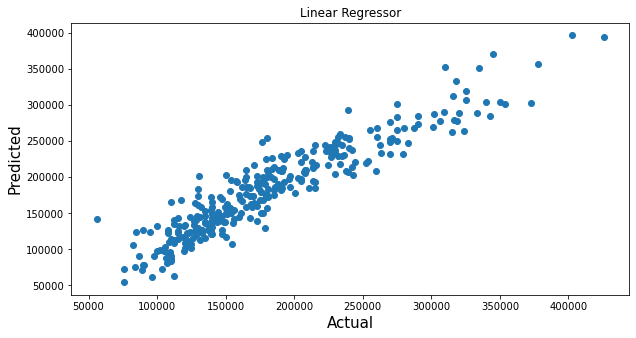

In [100]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction)
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Linear Regressor")
plt.show()

# Test Data

In [101]:
test_df =pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [102]:
test_df.shape

(292, 80)

Let us drop the same columns as we did in training the model as the prediction should not be made with different features

In [103]:
test_df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal','WoodDeckSF','EnclosedPorch','OpenPorchSF','3SsnPorch','PoolArea','TotRmsAbvGrd'], axis=1, inplace=True)

In [104]:
test_df.drop(['MasVnrArea','FireplaceQu','MasVnrType','BsmtFinSF2','2ndFlrSF','LowQualFinSF','BsmtHalfBath','ScreenPorch'],axis=1,inplace=True)

In [105]:
test_df.drop(['MSZoning','LandContour','LotFrontage','Utilities','LandSlope','Condition1',
               'Condition2','BsmtExposure','BsmtFinSF1','BsmtFinType2','BsmtUnfSF','Street',
               'Functional','GarageQual'],axis=1,inplace=True)

In [106]:
test_df.shape

(292, 46)

In [107]:
test_df.columns.to_list()

['MSSubClass',
 'LotArea',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [108]:
train_df.isnull().sum()

MSSubClass        0
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond         30
BsmtFinType1      0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
Fireplaces        0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageCond        0
PavedDrive        0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

In [109]:
test_df['BsmtCond'].value_counts()

TA    270
Gd      9
Fa      6
Name: BsmtCond, dtype: int64

In [110]:
test_df['BsmtCond'].fillna('NA', inplace=True)

In [111]:
test_df['BsmtCond'].value_counts()

TA    270
Gd      9
NA      7
Fa      6
Name: BsmtCond, dtype: int64

In [112]:
test_df['BsmtCond'] = test_df['BsmtCond'].replace('NA','TA',inplace=True)

In [113]:
test_df['BsmtQual'].fillna('TA',inplace=True)

In [114]:
test_df['BsmtFinType1'].fillna('Unf',inplace=True)

In [115]:
test_df['GarageType'].fillna('Attchd',inplace=True)

In [116]:
test_df['GarageYrBlt'].fillna(2006.0,inplace=True)

In [117]:
test_df['GarageFinish'].fillna('Unf',inplace=True)

In [118]:
test_df['GarageCond'].fillna('TA',inplace=True)

In [119]:
numerical_columns1=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold']


In [120]:
categorical_columns1=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


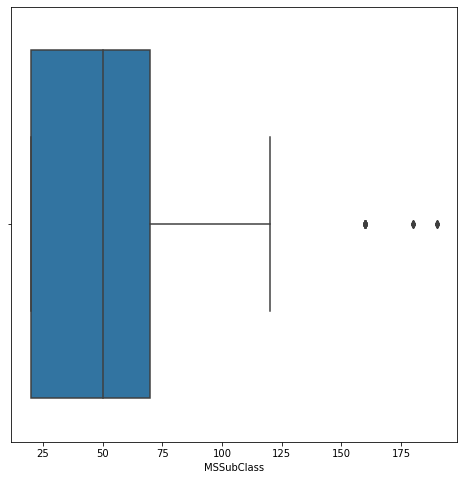

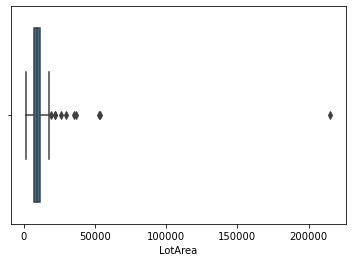

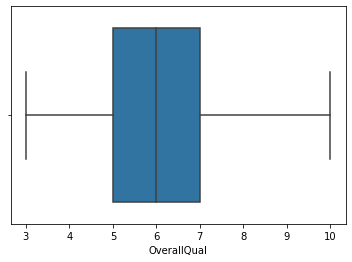

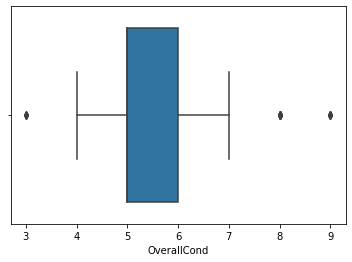

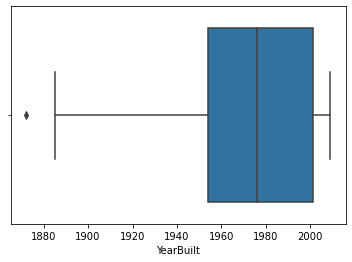

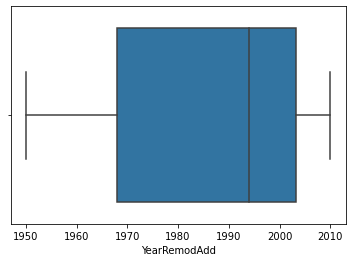

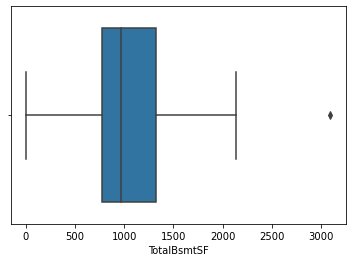

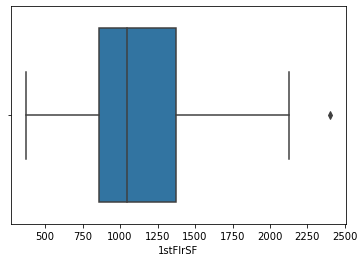

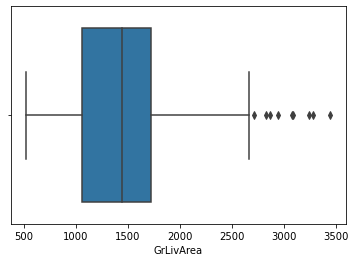

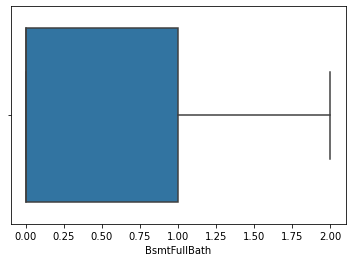

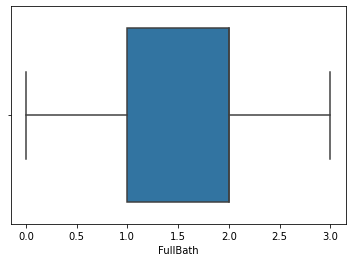

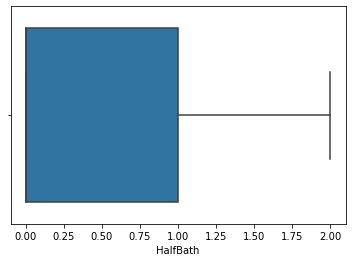

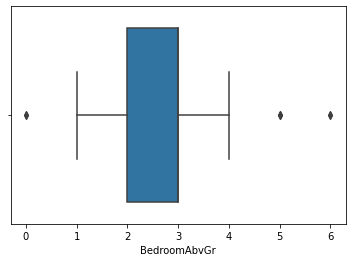

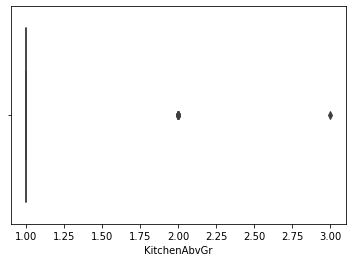

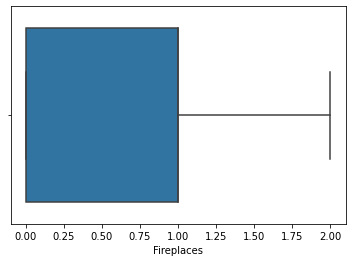

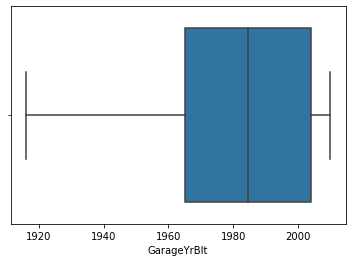

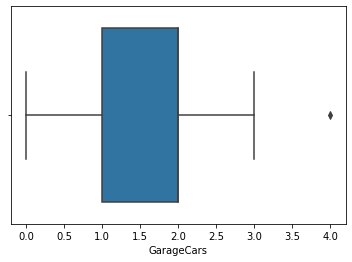

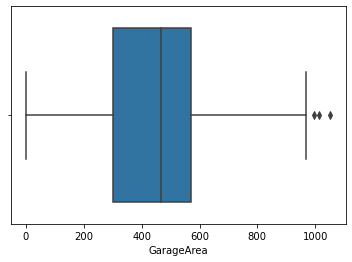

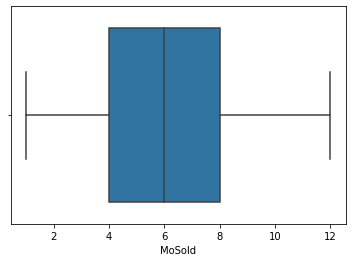

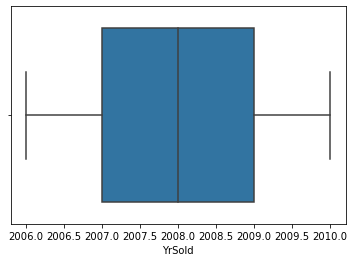

In [121]:
plt.figure(figsize=(8,8))
for i in numerical_columns1:
    sns.boxplot(test_df[i])
    plt.show()

In [122]:
features = test_df[['MSSubClass','LotArea','OverallCond','YearBuilt','TotalBsmtSF','1stFlrSF',
                   'GrLivArea','BedroomAbvGr','KitchenAbvGr','GarageCars','GarageArea']]

In [123]:
from scipy.stats import zscore
z=np.abs(zscore(features))
new_df1=test_df[(z<6).all(axis=1)]
new_df1.head()

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,20,14157,IR1,Corner,StoneBr,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Ex,None,GLQ,1922,GasA,Ex,Y,SBrkr,1922,1922,1,2,0,3,1,Gd,1,Attchd,2005.0,Fin,3,676,TA,Y,7,2007,WD,Normal
1,120,5814,IR1,CulDSac,StoneBr,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,Gd,None,GLQ,1220,GasA,Gd,Y,SBrkr,1360,1360,1,1,0,1,1,Gd,1,Attchd,1984.0,RFn,2,565,TA,Y,8,2009,COD,Abnorml
2,20,11838,Reg,Inside,CollgCr,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,None,Unf,1753,GasA,Ex,Y,SBrkr,1788,1788,0,2,0,3,1,Ex,1,Attchd,2001.0,RFn,2,522,TA,Y,6,2009,WD,Normal
3,70,12000,Reg,Inside,Crawfor,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,TA,None,Rec,704,GasA,Ex,Y,SBrkr,860,1564,0,1,1,3,1,Fa,1,Attchd,1941.0,Unf,1,234,TA,Y,7,2009,WD,Normal
4,60,14598,IR1,CulDSac,Somerst,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,None,Unf,894,GasA,Ex,Y,SBrkr,894,1933,0,2,1,4,1,Gd,1,BuiltIn,2007.0,Fin,3,668,TA,Y,1,2008,WD,Normal


In [124]:
test_df.shape, new_df1.shape

((292, 46), (290, 46))

In [125]:
data_loss = ((292-290)/292)*100
data_loss

0.684931506849315

In [126]:
num_columns1=[]
for i in new_df1.dtypes.index:
    if new_df1.dtypes[i]!='object':
        num_columns1.append(i)
print(num_columns1)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold']


In [127]:
new_df1[num_columns1].skew()

MSSubClass      1.350613
LotArea         3.711034
OverallQual     0.404377
OverallCond     1.199357
YearBuilt      -0.767218
YearRemodAdd   -0.540344
TotalBsmtSF     0.496914
1stFlrSF        0.681986
GrLivArea       1.019698
BsmtFullBath    0.405777
FullBath       -0.037048
HalfBath        0.748027
BedroomAbvGr    0.071122
KitchenAbvGr    4.422296
Fireplaces      0.531224
GarageYrBlt    -0.734544
GarageCars     -0.265030
GarageArea      0.152565
MoSold          0.184145
YrSold          0.031983
dtype: float64

In [128]:
fea = ['MSSubClass','LotArea','OverallCond','YearBuilt','1stFlrSF','GrLivArea','HalfBath',
       'KitchenAbvGr','GarageYrBlt']

In [129]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [130]:
new_df1[fea] = scaler.fit_transform(new_df1[fea].values)

In [131]:
new_df1[fea].skew()

MSSubClass      0.087267
LotArea         0.111247
OverallCond    -0.076870
YearBuilt      -0.173782
1stFlrSF       -0.001085
GrLivArea       0.000000
HalfBath        0.610034
KitchenAbvGr    0.000000
GarageYrBlt    -0.197424
dtype: float64

In [132]:
cat_col1=[]
for i in new_df1.dtypes.index:
    if new_df1.dtypes[i]=='object':
        cat_col1.append(i)
print(cat_col1)

['LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [133]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[cat_col1]= new_df1[cat_col1].apply(LE.fit_transform)
new_df1[cat_col1].head()

,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,0,21,0,2,3,0,9,11,2,3,2,0,0,2,0,0,1,3,2,1,0,4,2,5,2
1,0,1,21,4,2,1,0,5,5,2,3,1,2,0,2,0,2,1,3,2,1,1,4,2,0,0
2,3,4,4,0,2,3,0,9,11,2,3,2,2,0,5,0,0,1,3,0,1,1,4,2,5,2
3,3,4,5,0,5,1,0,6,7,3,3,1,3,0,4,0,0,1,3,1,1,2,4,2,5,2
4,0,1,20,0,5,1,0,9,11,2,3,2,2,0,5,0,0,1,3,2,3,0,4,2,5,2


In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(new_df1), columns=new_df1.columns)
X.head()

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,-1.151736,0.923431,-1.396531,-1.992591,1.566943,-0.443694,-0.516343,2.157882,-0.389492,1.218964,1.032547,1.856168,-0.07903,0.688869,0.727579,-0.851741,0.328033,0.770163,-2.542152,0.0,-0.412570,2.099746,-0.132453,-0.873696,0.249542,0.308256,1.834404,0.0,1.157218,0.780755,-0.741983,0.252015,-0.216637,-0.463430,0.660715,-0.662720,1.112383,-1.469603,1.690311,1.037021,0.182357,0.275316,0.275438,-0.644399,0.226966,0.156095
1,1.347455,-0.811315,-1.396531,-1.344048,1.566943,2.713882,-0.516343,1.418183,-0.389492,0.227595,-0.064115,-0.520383,-0.07903,-1.063517,-1.266103,-0.851741,0.328033,-0.528368,-0.301349,0.0,-0.412570,0.428415,-0.132453,0.652641,0.249542,0.308256,0.732676,0.0,1.157218,-1.045204,-0.741983,-2.225419,-0.216637,-0.463430,0.660715,-0.662720,-0.083750,-0.251932,0.354643,0.506942,0.182357,0.275316,0.635246,0.868765,-6.489381,-3.326023
2,-1.151736,0.544134,0.746294,0.601579,-1.276277,-0.443694,-0.516343,1.418183,-0.389492,1.008798,0.783305,1.856168,-0.07903,0.688869,0.727579,-0.851741,0.328033,0.770163,-0.301349,0.0,1.226406,1.697388,-0.132453,-0.873696,0.249542,0.308256,1.603185,0.0,-0.840361,0.780755,-0.741983,0.252015,-0.216637,-2.906971,0.660715,-0.662720,0.849759,-0.251932,0.354643,0.301596,0.182357,0.275316,-0.084369,0.868765,0.226966,0.156095
3,0.709568,0.572380,0.746294,0.601579,-1.109029,-0.443694,1.011610,0.678483,1.391493,-1.122117,-1.758956,-0.520383,-0.07903,-0.625420,-0.601542,0.636241,0.328033,-0.528368,0.819052,0.0,0.680081,-0.800085,-0.132453,-0.873696,0.249542,0.308256,-0.708139,0.0,-0.840361,-1.045204,1.341938,0.252015,-0.216637,-1.685200,0.660715,-0.662720,-1.507674,0.965739,-0.981025,-1.073742,0.182357,0.275316,0.275438,0.868765,0.226966,0.156095
4,0.510158,0.990132,-1.396531,-1.344048,1.399695,-0.443694,1.011610,-0.061217,-0.389492,1.328181,1.082395,-0.520383,-0.07903,0.688869,0.727579,-0.851741,0.328033,0.770163,-0.301349,0.0,1.226406,-0.347730,-0.132453,-0.873696,0.249542,0.308256,-0.587082,0.0,-0.840361,0.780755,1.341938,1.490732,-0.216637,-0.463430,0.660715,0.491567,1.250660,-1.469603,1.690311,0.998817,0.182357,0.275316,-1.883404,0.112183,0.226966,0.156095


In [135]:
prediction = LR.predict(X)
prediction

array([285155.19506567, 198909.43060621, 249515.83784072, 172719.40452502,
       209902.5439066 , 112833.14751011, 138015.98574475, 281304.49075506,
       238103.13546679, 175132.98941399, 119889.4804414 , 162978.74573847,
       156947.94661362, 209992.82112069, 264209.56986675, 141698.13317823,
       130497.45790686, 148828.41634025, 197509.13441178, 209851.63197081,
       162552.23569595, 137814.70656959, 148770.76572387, 132646.86871767,
       122803.45225658, 136713.03360938, 167337.21598064, 144008.98725623,
       178982.40771041,  99257.91633565, 101220.9418354 , 213987.27139923,
       234193.98326755, 180561.33499623, 150873.62455436, 164867.79019855,
       193364.97581506, 121031.1843838 , 162707.26354435, 132336.83554166,
       124960.71335555, 247909.76507634, 204594.00357419, 206651.30483546,
       173401.80567165, 144593.79250473, 145749.49335842, 130024.5404341 ,
       207025.00425718, 336775.88515415, 141299.9803253 , 200295.00890765,
       113298.39251182, 1